# Introduction to Embeddings

## Learning Objectives
- Understand what embeddings are and why they're fundamental to modern NLP
- Grasp the embedding hypothesis and its mathematical implications
- Explore the historical development from LSA to modern embedding techniques
- Develop mathematical intuition for embedding spaces

## 1. What are Embeddings? A Conceptual Introduction

### 1.1 Formal Definition

An embedding is a mapping function $f: V \rightarrow \mathbb{R}^d$ that transforms discrete objects (like words) from a vocabulary $V$ into continuous vector representations in a $d$-dimensional real vector space.

Key properties:
- **Continuous representation**: Unlike one-hot encoding, embeddings map to continuous values
- **Dense representation**: All dimensions typically contain non-zero values
- **Lower dimensionality**: Usually $d \ll |V|$, where $|V|$ is vocabulary size
- **Learned representation**: The mapping is learned from data to capture semantic relationships

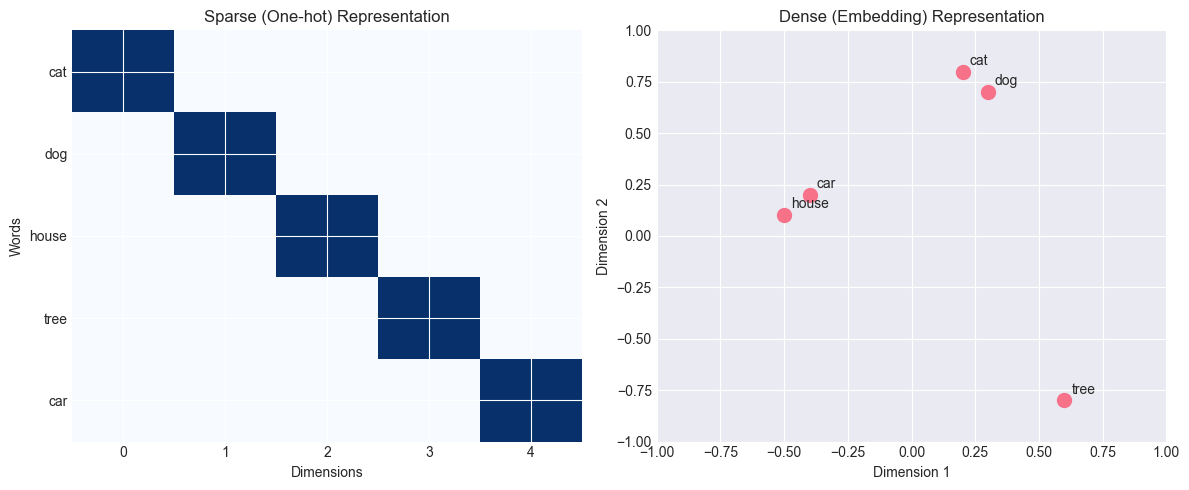

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Set style for all plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Demonstration: Comparing sparse vs dense representations
def visualize_representations():
    # Sparse representation (one-hot)
    words = ['cat', 'dog', 'house', 'tree', 'car']
    sparse_vectors = np.eye(5)  # 5x5 identity matrix
    
    # Dense representation (embeddings)
    # These are hypothetical learned embeddings
    dense_vectors = np.array([
        [0.2, 0.8],   # cat
        [0.3, 0.7],   # dog
        [-0.5, 0.1],  # house
        [0.6, -0.8],  # tree
        [-0.4, 0.2]   # car
    ])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Sparse representation
    ax1.imshow(sparse_vectors, cmap='Blues', aspect='auto')
    ax1.set_title('Sparse (One-hot) Representation')
    ax1.set_xlabel('Dimensions')
    ax1.set_ylabel('Words')
    ax1.set_yticks(range(5))
    ax1.set_yticklabels(words)
    
    # Dense representation
    ax2.scatter(dense_vectors[:, 0], dense_vectors[:, 1], s=100)
    for i, word in enumerate(words):
        ax2.annotate(word, (dense_vectors[i, 0], dense_vectors[i, 1]), 
                    xytext=(5, 5), textcoords='offset points')
    ax2.set_title('Dense (Embedding) Representation')
    ax2.set_xlabel('Dimension 1')
    ax2.set_ylabel('Dimension 2')
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    
    plt.tight_layout()
    plt.show()

visualize_representations()

### 1.2 Recap: Sparse vs Dense Representations

From our previous notebook, we learned that:

| Property | Sparse (One-hot) | Dense (Embeddings) |
|----------|-----------------|-------------------|
| Dimensionality | $O(\|V\|)$ | $O(d)$, where $d \ll \|V\|$ |
| Storage | $O(\|V\| \times \|D\|)$ | $O(d \times \|D\|)$ |
| Semantic Information | None | Captured in continuous space |
| Similarity Computation | Binary (0 or 1) | Continuous (cosine similarity) |

where $|V|$ is vocabulary size and $|D|$ is document collection size.

## 2. The Embedding Hypothesis

### 2.1 Core Principle

The embedding hypothesis states that:

> Words with similar meanings should have similar vector representations in the embedding space.

Mathematically, this translates to:
- If words $w_i$ and $w_j$ are semantically similar, then $\text{sim}(f(w_i), f(w_j))$ should be high
- Common similarity measures: cosine similarity, Euclidean distance

### 2.2 Mathematical Formulation

For words $w_i$ and $w_j$ with embeddings $\mathbf{v}_i$ and $\mathbf{v}_j$:

**Cosine Similarity**:
$$\text{cos}(\mathbf{v}_i, \mathbf{v}_j) = \frac{\mathbf{v}_i \cdot \mathbf{v}_j}{||\mathbf{v}_i|| \cdot ||\mathbf{v}_j||} = \frac{\sum_{k=1}^{d} v_{i,k} \cdot v_{j,k}}{\sqrt{\sum_{k=1}^{d} v_{i,k}^2} \cdot \sqrt{\sum_{k=1}^{d} v_{j,k}^2}}$$

**Euclidean Distance**:
$$d(\mathbf{v}_i, \mathbf{v}_j) = ||\mathbf{v}_i - \mathbf{v}_j||_2 = \sqrt{\sum_{k=1}^{d} (v_{i,k} - v_{j,k})^2}$$

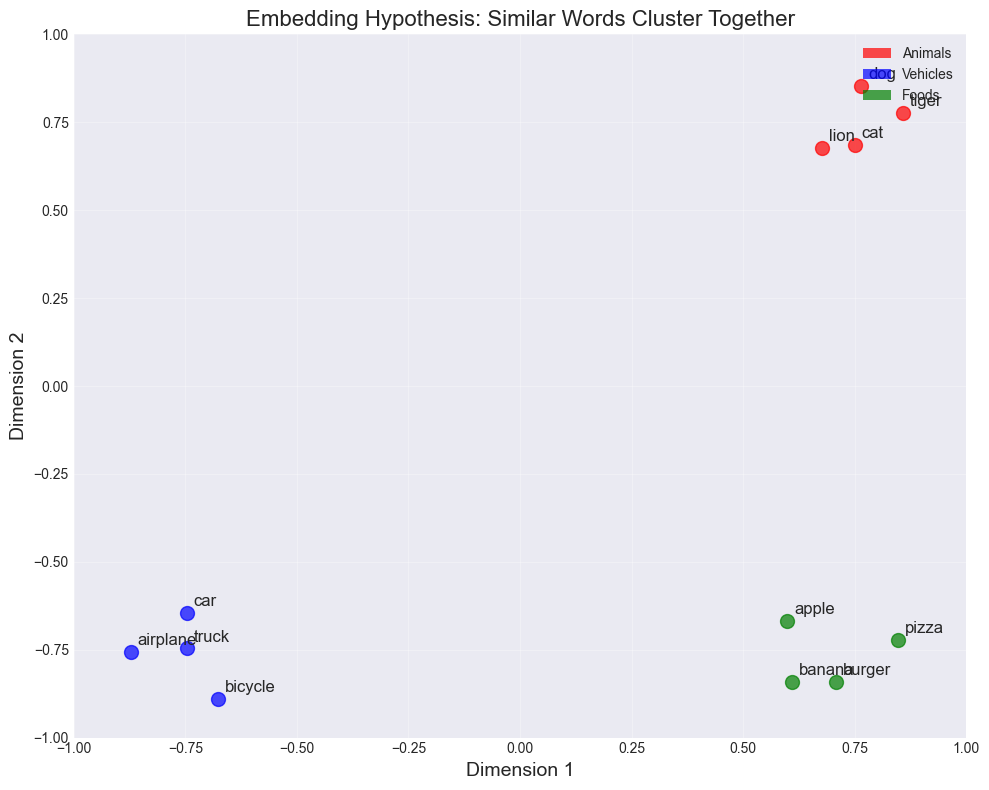

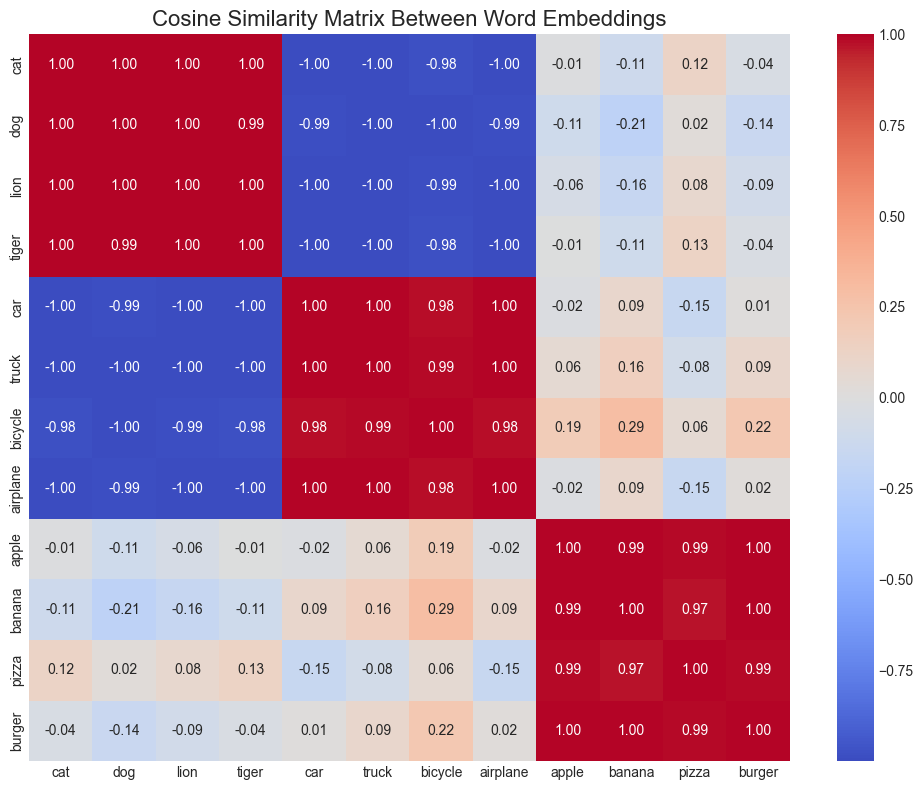

In [2]:
def demonstrate_embedding_hypothesis():
    """
    Demonstrate the embedding hypothesis with a simple example
    showing how similar words cluster in embedding space
    """
    # Create synthetic embeddings for different word categories
    np.random.seed(42)
    
    # Animal embeddings (cluster around [0.7, 0.7])
    animals = {
        'cat': [0.7, 0.7] + np.random.normal(0, 0.1, 2),
        'dog': [0.7, 0.7] + np.random.normal(0, 0.1, 2),
        'lion': [0.7, 0.7] + np.random.normal(0, 0.1, 2),
        'tiger': [0.7, 0.7] + np.random.normal(0, 0.1, 2)
    }
    
    # Vehicle embeddings (cluster around [-0.7, -0.7])
    vehicles = {
        'car': [-0.7, -0.7] + np.random.normal(0, 0.1, 2),
        'truck': [-0.7, -0.7] + np.random.normal(0, 0.1, 2),
        'bicycle': [-0.7, -0.7] + np.random.normal(0, 0.1, 2),
        'airplane': [-0.7, -0.7] + np.random.normal(0, 0.1, 2)
    }
    
    # Food embeddings (cluster around [0.7, -0.7])
    foods = {
        'apple': [0.7, -0.7] + np.random.normal(0, 0.1, 2),
        'banana': [0.7, -0.7] + np.random.normal(0, 0.1, 2),
        'pizza': [0.7, -0.7] + np.random.normal(0, 0.1, 2),
        'burger': [0.7, -0.7] + np.random.normal(0, 0.1, 2)
    }
    
    # Visualization
    plt.figure(figsize=(10, 8))
    
    # Plot animals
    for word, vec in animals.items():
        plt.scatter(vec[0], vec[1], c='red', s=100, alpha=0.7)
        plt.annotate(word, (vec[0], vec[1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12)
    
    # Plot vehicles
    for word, vec in vehicles.items():
        plt.scatter(vec[0], vec[1], c='blue', s=100, alpha=0.7)
        plt.annotate(word, (vec[0], vec[1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12)
    
    # Plot foods
    for word, vec in foods.items():
        plt.scatter(vec[0], vec[1], c='green', s=100, alpha=0.7)
        plt.annotate(word, (vec[0], vec[1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12)
    
    plt.title('Embedding Hypothesis: Similar Words Cluster Together', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True, alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', alpha=0.7, label='Animals'),
        Patch(facecolor='blue', alpha=0.7, label='Vehicles'),
        Patch(facecolor='green', alpha=0.7, label='Foods')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Compute and display similarity matrix
    all_words = list(animals.keys()) + list(vehicles.keys()) + list(foods.keys())
    all_vectors = list(animals.values()) + list(vehicles.values()) + list(foods.values())
    
    # Compute cosine similarities
    n_words = len(all_words)
    similarity_matrix = np.zeros((n_words, n_words))
    
    for i in range(n_words):
        for j in range(n_words):
            vec_i = np.array(all_vectors[i])
            vec_j = np.array(all_vectors[j])
            similarity_matrix[i, j] = np.dot(vec_i, vec_j) / (np.linalg.norm(vec_i) * np.linalg.norm(vec_j))
    
    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=all_words, yticklabels=all_words, 
                cmap='coolwarm', center=0, annot=True, fmt='.2f')
    plt.title('Cosine Similarity Matrix Between Word Embeddings', fontsize=16)
    plt.tight_layout()
    plt.show()

demonstrate_embedding_hypothesis()

## 3. Historical Context: LSA and Early Dimensionality Reduction

### 3.1 Latent Semantic Analysis (LSA)

LSA was one of the first successful approaches to creating dense word representations from sparse data.

**Mathematical Foundation**:
1. Start with term-document matrix $\mathbf{X} \in \mathbb{R}^{|V| \times |D|}$
2. Apply Singular Value Decomposition (SVD): $\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$
3. Truncate to $k$ dimensions: $\mathbf{X}_k = \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T$
4. Word embeddings are rows of $\mathbf{U}_k \mathbf{\Sigma}_k$

**Key Properties**:
- Captures latent semantic structure
- Reduces dimensionality while preserving important information
- Based on linear algebra (SVD)

IndexError: index 6 is out of bounds for axis 0 with size 6

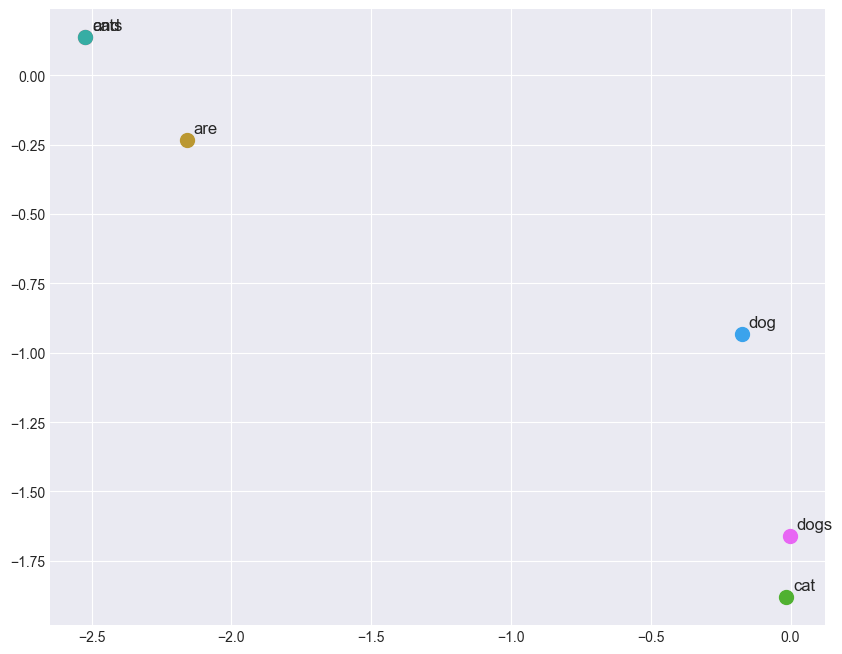

In [3]:
def demonstrate_lsa(k=2):
    """
    Demonstrate LSA on a small corpus
    
    Parameters:
    k (int): Number of dimensions to keep (default=2)
    """
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.linalg import svd
    
    # Small corpus
    documents = [
        "The cat sits on the mat",
        "The dog runs in the park",
        "Cats and dogs are pets",
        "The mat is on the floor",
        "Dogs love running in parks",
        "Pets need food and water"
    ]
    
    # Create term-document matrix
    vectorizer = CountVectorizer(stop_words=None)  # Include all words
    X = vectorizer.fit_transform(documents).toarray()
    terms = vectorizer.get_feature_names_out()
    
    # Apply SVD with full_matrices=False to get economic SVD
    U, s, Vt = svd(X, full_matrices=False)
    
    # Truncate to k dimensions for visualization
    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]
    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]
    
    # Word embeddings (rows of U_k * Σ_k)
    word_embeddings = U_k @ np.diag(s_k)
    
    # Visualize word embeddings
    plt.figure(figsize=(10, 8))
    
    # Plot words
    for i, term in enumerate(terms):
        plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1], s=100)
        plt.annotate(term, (word_embeddings[i, 0], word_embeddings[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=12)
    
    plt.title('LSA Word Embeddings (2D)', fontsize=16)
    plt.xlabel('LSA Dimension 1', fontsize=14)
    plt.ylabel('LSA Dimension 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show explained variance
    explained_variance_ratio = s**2 / np.sum(s**2)
    
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(s) + 1), explained_variance_ratio)
    plt.title('Explained Variance by SVD Components', fontsize=16)
    plt.xlabel('Component', fontsize=14)
    plt.ylabel('Explained Variance Ratio', fontsize=14)
    plt.xticks(range(1, len(s) + 1))
    plt.tight_layout()
    plt.show()
    
    # Document embeddings (for comparison)
    doc_embeddings = Vt_k.T @ np.diag(s_k)
    
    plt.figure(figsize=(10, 8))
    for i, doc in enumerate(documents):
        plt.scatter(doc_embeddings[i, 0], doc_embeddings[i, 1], s=100)
        plt.annotate(f"Doc {i+1}", (doc_embeddings[i, 0], doc_embeddings[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=12)
    
    plt.title('LSA Document Embeddings (2D)', fontsize=16)
    plt.xlabel('LSA Dimension 1', fontsize=14)
    plt.ylabel('LSA Dimension 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return word_embeddings, terms

word_embeddings, terms = demonstrate_lsa()

### 3.2 Limitations of LSA

While groundbreaking, LSA had several limitations:

1. **Linear relationships only**: Cannot capture non-linear semantic relationships
2. **Global co-occurrence**: Doesn't distinguish between different contexts
3. **Static representations**: Words have single representations regardless of context
4. **Computational complexity**: SVD on large matrices is expensive

These limitations motivated the development of:
- Neural word embeddings (Word2Vec, GloVe)
- Contextual embeddings (ELMo, BERT)

## 4. Mathematical Foundations for Modern Embeddings

### 4.1 The Distributional Hypothesis

> "You shall know a word by the company it keeps." - J.R. Firth

Mathematically, this translates to:
- Words appearing in similar contexts should have similar representations
- Context can be defined by surrounding words within a window

### 4.2 Key Mathematical Concepts

1. **Embedding Matrix**: $\mathbf{E} \in \mathbb{R}^{|V| \times d}$
   - Each row represents a word's embedding
   - Learned through optimization

2. **Context Window**: For position $t$ in text, context is words in $[t-c, t+c]$

3. **Optimization Objective**: Learn embeddings that maximize likelihood of observed word-context pairs

### 4.3 Preview: Modern Approaches

1. **Word2Vec**: Uses neural networks with either:
   - Skip-gram: Predict context from word
   - CBOW: Predict word from context

2. **GloVe**: Combines global matrix factorization with local context windows

3. **FastText**: Incorporates subword information

## 5. Self-Assessment Quiz

### Question 1
What is the fundamental difference between sparse and dense word representations?

<details>
<summary>Answer</summary>

Sparse representations (like one-hot encoding) use high-dimensional vectors where most elements are zero, with dimensionality equal to vocabulary size. Dense representations (embeddings) use low-dimensional continuous vectors where most elements are non-zero, capturing semantic relationships in a compact form.
</details>

### Question 2
Explain the embedding hypothesis in your own words.

<details>
<summary>Answer</summary>

The embedding hypothesis states that words with similar meanings should have similar vector representations in the embedding space. This means semantically related words will be closer together (using measures like cosine similarity) than unrelated words.
</details>

### Question 3
What is the mathematical operation at the core of Latent Semantic Analysis?

<details>
<summary>Answer</summary>

Singular Value Decomposition (SVD). LSA applies SVD to the term-document matrix: $\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, then truncates to k dimensions to get dense representations.
</details>

## 6. Further Resources

### Research Papers
1. Deerwester et al. (1990) - "Indexing by Latent Semantic Analysis"
2. Mikolov et al. (2013) - "Efficient Estimation of Word Representations in Vector Space"
3. Pennington et al. (2014) - "GloVe: Global Vectors for Word Representation"

### Books
1. "Speech and Language Processing" by Jurafsky & Martin (Chapter 6)
2. "Natural Language Processing with Python" by Bird, Klein, & Loper

### Online Resources
1. Stanford CS224N: Natural Language Processing with Deep Learning
2. fast.ai NLP Course
3. Jay Alammar's Blog: "The Illustrated Word2Vec"

---
**Next Notebook**: `09_Word2Vec_and_Modern_Embeddings.ipynb` - Deep dive into Word2Vec architecture and training